# 自动报表—盘点
## 01. ERP预分单

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os

#计算方法
def calrate(num1,num2):
    return (num1-num2)/num1

def caldiff(num1,num2):
    
    return None

#设置pandas
pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # 禁用科学计数法
#pd.set_option('display.max_rows',None)

#打开文件
df_ERP_output_stock1 = pd.read_excel(r'I:\#Data\201912\20191228\12限额领料单列表.XLS',usecols=[2,3,6,4]).fillna(0)
df_ERP_output_stock2 = pd.read_excel(r'I:\#Data\201912\20191228\1限额领料单列表.XLS',usecols=[2,3,4,6]).fillna(0)
df_bar_output_stock1 = pd.read_excel(r'I:\#Data\201912\20191228\1领料出库单列表.XLSx',usecols=[6,10]).fillna(0)
df_erp_inv = pd.read_excel(r'I:\#Data\201912\20191228\库存展望.XLS',usecols=[6,7,8,9,10,11]).fillna(0)
df_bar_inv = pd.read_excel(r'I:\#Data\201912\20191228\库存汇总表.xlsx',usecols=[0,6])
df_stagnate = pd.read_excel(r'I:\#Data\201912\20191228\盘点完成.xlsx',usecols=[0,4,7])
#df_inv_check = pd.read_excel(r'I:\#Data\201912\20191228\库存盘点单列表.xlsx',usecols=[0,1,2,4,5,6,7,8,9])
#df_erp_inv=df_erp_inv.iloc[0:10]
df11 = pd.pivot_table(df_ERP_output_stock1,values='计划出库数量',index='材料编码',aggfunc='sum')
df12 = pd.pivot_table(df_ERP_output_stock2,values='计划出库数量',index='材料编码',aggfunc='sum')

#df1是ERP结存
df1 = pd.merge(df_erp_inv,df11,left_on='存货编码',right_on='材料编码',how='left').fillna(0)
df1 = pd.merge(df1,df12,left_on='存货编码',right_on='材料编码',how='left').fillna(0)
df1['现存量']=df1['现存量'].astype('float')
#df['结存'] = df[['现存量','计划出库数量_x','计划出库数量_y']].apply(lambda x:x['现存量']-x['计划出库数量_X']-x['计划出库数量_y'],axis=1)
df1['结存'] = df1.apply(lambda x:x.现存量-x.计划出库数量_x-x.计划出库数量_y,axis=1)
#df1
#########################################################################

#1月份出库合计
df21 =pd.pivot_table(df_bar_output_stock1,values='计划数量',index='资材编号',aggfunc='sum')

#12月份条码结存
df2 = pd.merge(df_bar_inv,df21,on='资材编号',how='left').fillna(0)
df2['结存'] = df2.apply(lambda x:x.期末数量+x.计划数量,axis=1)
#df1
##########################################################################
df0 = pd.merge(df1,df2,left_on='存货编码',right_on='资材编号',how='outer')
df = pd.merge(df0,df_stagnate,on='存货编码',how='left').fillna(0)
df['出库率'] = df.apply(lambda x:'高' if((x.计划出库数量_x+x.计划出库数量_y)>0) else '低',axis=1)
df['盘点差'] = df.apply(lambda x:0 if(x.结存_x==0) else (x.结存_x-x.结存_y)/x.结存_x,axis=1)
df = df[['存货编码','存货名称','规格型号','单位','库管员','结存_x','结存_y','出库率','盘点差','现存量_y','类别']]
df
#df[df['出库率']=='高']

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


存货编码   存货名称          规格型号   单位  库管员   结存_x   结存_y 出库率  盘点差  现存量_y  \
0     BF00C50001  铁氧体磁芯     W-W02228A  PCS  黄明喜  20.00  20.00   低 0.00   0.00   
1     BF26M00050  底漆稀释剂            HK   KG   蒋鹏  16.00   0.00   低 1.00   0.00   
2     BF26M00051   米黄面漆        PC2000   KG   蒋鹏  18.00   0.00   低 1.00   0.00   
3     BF26M00052   灰色底漆  UNIGROUND930   KG   蒋鹏 102.00   0.00   低 1.00   0.00   
4     BF26M00053    固化剂        PC2000   KG   蒋鹏   3.60   0.00   低 1.00   0.00   
...          ...    ...           ...  ...  ...    ...    ...  ..  ...    ...   
7023           0      0             0    0    0   0.00 576.00   低 0.00   0.00   
7024           0      0             0    0    0   0.00 204.00   低 0.00   0.00   
7025           0      0             0    0    0   0.00 302.00   低 0.00   0.00   
7026           0      0             0    0    0   0.00 215.00   低 0.00   0.00   
7027           0      0             0    0    0   0.00 179.00   低 0.00   0.00   

     类别  
0     0  
1     0  
2     0  
3     0  
4     0  
...  ..  
7023  0  
7024  0  
7025  0  
7026  0  
7027  0  

[7028 rows x 11 columns]

In [25]:
pd.set_option('display.max_rows',None)
df30 = df[(df['现存量_y']>0)]
df39 = pd.merge(df,df30,on='存货编码',how='outer')
df39

存货编码                           存货名称_x  \
0      BF00C50001                            铁氧体磁芯   
1      BF26M00050                            底漆稀释剂   
2      BF26M00051                             米黄面漆   
3      BF26M00052                             灰色底漆   
4      BF26M00053                              固化剂   
5      BF26M00054                              稀释剂   
6      BF32C90012                             点焊螺母   
7      BF32C90104                             点焊螺母   
8      BF32C90399                             点焊螺母   
9      BF36A00201                               标签   
10     BF36A00211                               标签   
11     BF36A00212                               标签   
12     BF36A00221                               标签   
13     BF36A60024                            使用说明书   
14     BF36A60025                        使用说明书(中文)   
15     BF36D00035                            使用说明书   
16     BF42C90088                               开关   
17     BF45A04648                               电阻   
18     BF45C51138                               电容   
19     BF45E1Q014                           IGBT模块   
20     BF45K12503                            线路板基板   
21     BF45K50769                               基板   
22     BF45K50774                            线路板基板   
23     BF45K50775                            线路板基板   
24     BF45K50789                            线路板基板   
25     BF45K50802                            线路板基板   
26     BF48A00057                            印刷线路板   
27     BF48A00074                            印刷线路板   
28     BF57B8M006                             送丝软管   
29     BF57B8M009                              送丝管   
30     BF57B8M012                              送丝管   
31     BF57B8M039                             送丝软管   
32     BF57B8M040                             送丝软管   
33     BF57B8M041                             送丝软管   
34     BF57G10082                              铜夹块   
35     BF66L10073                                板   
36     DV01C90001                               铁链   
37     DV01M00001                               板条   
38     DV01M00002                               板条   
39     DV07M00001                              散热片   
40     DV21A10001                            小卷筒垫片   
41     DV21A10002                              绝缘板   
42     DV21A20001                           间隙密封胶带   
43     DV21A20002                           间隙密封胶带   
44     DV21A40001                              石棉板   
45     DV21A40002                              石棉板   
46     DV21A40003                              石棉板   
47     DV21A40004                              石棉板   
48     DV21A40006                              石棉板   
49     DV22A20001                             线号胶带   
50     DV22A20002                             线号胶带   
51     DV22A20003                             线号胶带   
52     DV22A20004                             线号胶带   
53     DV22A20005                             线号胶带   
54     DV22A20006                             线号胶带   
55     DV22A20007                             线号胶带   
56     DV22D10001                             绝缘纸垫   
57     DV22D20001                             电绝缘管   
58     DV22D20003                              绝缘管   
59     DV22D20005                              绝缘管   
60     DV22D20006                               绑带   
61     DV22D20007                               绑带   
62     DV22E60001                             PVC管   
63     DV30C00001                           十字圆头螺栓   
64     DV30C00002                           十字圆头螺栓   
65     DV30C00003                           十字圆头螺栓   
66     DV30C00004                             自攻螺栓   
67     DV30C10001                         十字沉头自攻螺栓   
68     DV31B50001                             六角螺栓   
69     DV31B50002                               螺栓   
70     DV32B00001                               螺母   
71     DV32D10001                               垫圈   
72     DV32D10002                            光垫（蓝）   
73     DV32D10003

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
====================df1数据预览======================
<bound method NDFrame.head of             存货编码  结果      存货名称                规格型号   单位      现存量  库管员  \
0     BF00C50001  相等     铁氧体磁芯           W-W02228A  PCS    20.00  黄明喜   
1     BF26M00050   多     底漆稀释剂                  HK   KG    16.00   蒋鹏   
2     BF26M00051   多      米黄面漆              PC2000   KG    18.00   蒋鹏   
3     BF26M00052   多      灰色底漆        UNIGROUND930   KG   102.00   蒋鹏   
4     BF26M00053   多       固化剂              PC2000   KG     3.60   蒋鹏   
...          ...  ..       ...                 ...  ...      ...  ...   
6948  TT73A20201   少  绝缘垫73...  P15011E06(130A3...  PCS   299.00  齐华香   
6949  TT79A5T006  相等      橡胶衬套            U5972G01  PCS   100.00  谈文丽   
6950  TT79B31028  相等  螺母(TY...            U4167F03  PCS    10.00  谈文丽   
6951  TT79E00805   少       开关盖            U2853C05  PCS 18676.00  谈文丽   
6952  TTY3763C01   多        夹管            Y3

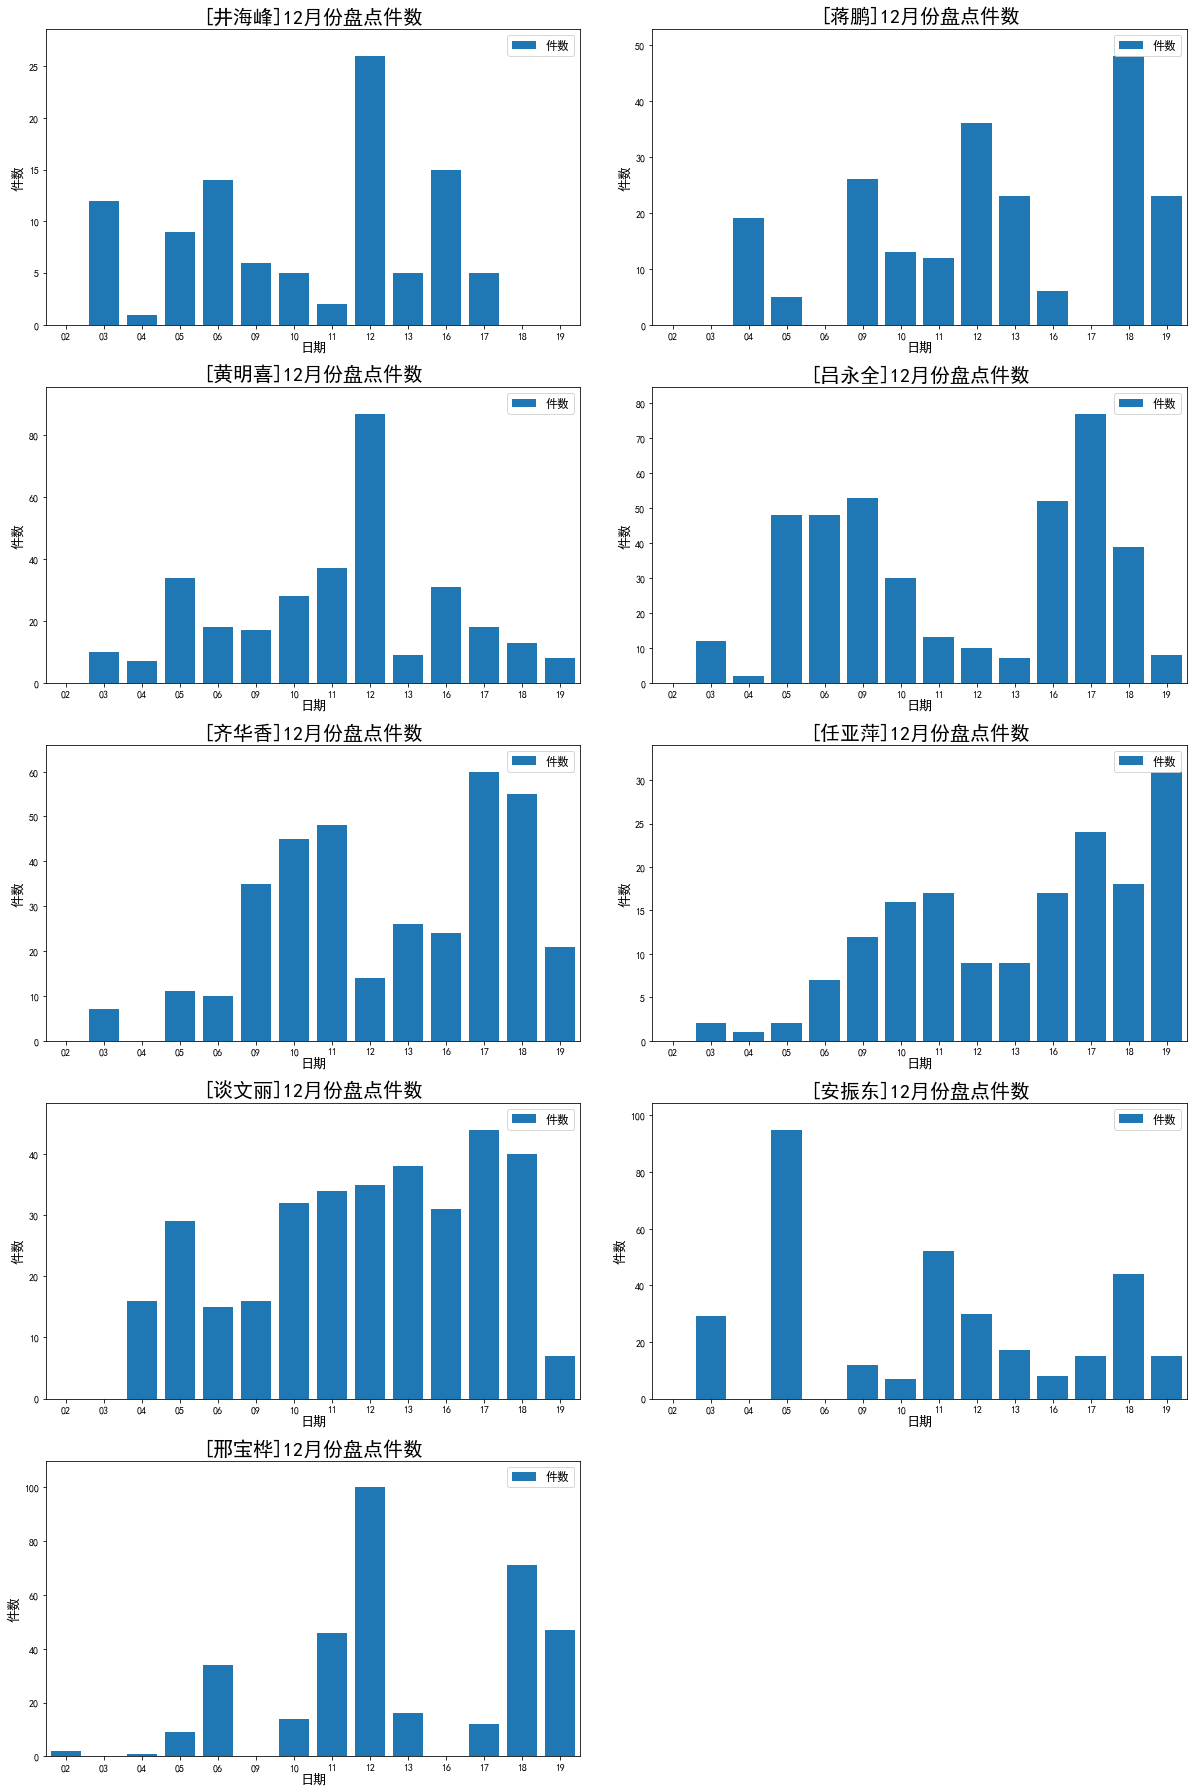

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os

def getDate():
    res = []
    for r in df2['单据日期']:
        res.append(r[8:10])
    return res

def getResult():
    res = []
    for row in df1:
        if(r == 0):
            res.append('相等')
        elif(r > 0):
            res.append('多')
        elif(r < 0):
            res.append('少')
        else:
            res.append(r)
    return res

pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # 禁用科学计数法
#pd.set_option('display.max_rows',None)

#01 打开文件
df_ERP_output_stock = pd.read_excel(r'I:\#Data\20191228\12限额领料单列表.XLS')
df_ERP_output_stock1 = pd.read_excel(r'I:\#Data\20191228\1限额领料单列表.XLS')
df_BAR_output_stock1 = pd.read_excel(r'I:\#Data\20191228\1领料出库单列表.XLS')
df_erp_inv = pd.read_excel(r'I:\#Data\20191228\库存展望.XLS')
df_bar_inv = pd.read_excel(r'I:\#Data\20191216\库存汇总表.xlsx',usecols=[0,6])
df_inv_check = pd.read_excel(r'I:\#Data\20191216\库存盘点单列表.xlsx',usecols=[0,1,2,4,5,6,7,8,9])

#print("出库单=======================")
#print(df_output_stock)
#print("ERP库存=======================")
#print(df_erp_stock)
#print("条码库存=======================")
#print(df_bar_stock)
#print("盘点明细=======================")
#print(df_inv_stock)
#df_inv_stock['盘点日期'] = df_inv_stock.apply(lambda row:str(row[1]))

#02 对限额领料单进行分类汇总，求出出库数量
df_output_stock_sum = df_output_stock.groupby('材料编码').aggregate({'计划出库数量':'sum'}).reset_index()

#03 连接表
df = pd.merge(df_erp_stock,df_output_stock_sum,left_on='存货编码',right_on='材料编码',how='left').fillna(0)[0:-2]

#04 计算列
df['ERP数量'] = df.apply(lambda row: float(row.现存量) - row.计划出库数量, axis=1)
df['存货名称'] = df.apply(lambda row:row[1] if(len(row[1])<=5) else row[1][0:5]+'...',axis=1)
df['规格型号'] = df.apply(lambda row:row[2] if(len(str(row[2]))<=15) else str(row[2])[0:15]+'...',axis=1)
#df_inv_stock['盘点日期'] = df_inv_stock.apply(lambda row:row[1])
#print("ERP库存与出库合计的连接表")
#print(df)

#05 修改列名称
#df.rename(columns={'存货信息存货编码':'存货编码','存货信息存货名称':'存货名称','存货信息规格型号':'规格型号','存货信息主计量单位':'单位','计划出库数量':'出库合计'},inplace=True)


#06 连接ERP库存表与条码库存表
df1 = pd.merge(df,df_bar_stock,left_on='存货编码',right_on='资材编号',how='left').fillna(0)
df1['diff'] = df1.apply(lambda row: row.ERP数量 - row.条码数量, axis=1)
df1.insert(1,'结果',getResult())
#07 显示列信息
#df1 = df1[['存货编码','存货名称','规格型号','单位','库管员','现存量','出库合计','预分单库存','期末数量']]
#df1 = df1[['存货编码','库管员','ERP数量','条码数量']]

print("====================df1数据预览======================")
print(df1.head)







df2 = df_inv_stock[df_inv_stock['单据日期']>'2019/12/01']
df2.insert(2,'日期',getDate())
df4 = pd.pivot_table(
    df2,
    values='单据编号',
    columns='创建人',
    index='日期',
    aggfunc='count',
    fill_value=0,
    #margins=True,
    margins_name='合计')
df3 = df4.reset_index()

plt.figure(figsize=(17,25))
plt.rcParams['font.sans-serif']='SimHei'
person = ['井海峰','蒋鹏','黄明喜','吕永全','齐华香','任亚萍','谈文丽','安振东','邢宝桦']
i=0
for p in person:
    i = i + 1
    plt.subplot(5,2,i,xmargin=0.01,ymargin=0.1)
    x = df3['日期']
    y = df3[p]
    plt.bar(x,y,label="件数")
    plt.legend(fontsize=12)
    plt.xlabel('日期',fontsize=13,labelpad=1)
    plt.ylabel('件数',fontsize=13)
    #plt.xtick(rotation=12)
    plt.title(label='['+p+']12月份盘点件数',fontsize=20)
    
plt.subplots_adjust(left=0,bottom=0,right=1,top=10,wspace=5,hspace=55)
plt.tight_layout()
#plt.savefig('test181518.jpg')


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os

def getDate():
    res = []
    for r in df2['单据日期']:
        res.append(r[8:10])
    return res

def getResult():
    res = []
    for r in df1['diff']:
        res.append(r*10)
    return res

pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # 禁用科学计数法
#pd.set_option('display.max_rows',None)

#01 打开文件
df = pd.read_excel(r'I:\#Data\20191216\sales-funnel.xlsx')
df

Account                          Name            Rep        Manager  \
0    714466               Trantow-Barrows   Craig Booker   Debra Henley   
1    714466               Trantow-Barrows   Craig Booker   Debra Henley   
2    714466               Trantow-Barrows   Craig Booker   Debra Henley   
3    737550  Fritsch, Russel and Anderson   Craig Booker   Debra Henley   
4    146832                  Kiehn-Spinka  Daniel Hilton   Debra Henley   
5    218895                     Kulas Inc  Daniel Hilton   Debra Henley   
6    218895                     Kulas Inc  Daniel Hilton   Debra Henley   
7    412290                 Jerde-Hilpert     John Smith   Debra Henley   
8    740150                    Barton LLC     John Smith   Debra Henley   
9    141962                    Herman LLC    Cedric Moss  Fred Anderson   
10   163416                   Purdy-Kunde    Cedric Moss  Fred Anderson   
11   239344                    Stokes LLC    Cedric Moss  Fred Anderson   
12   239344                    Stokes LLC    Cedric Moss  Fred Anderson   
13   307599   Kassulke, Ondricka and Metz     Wendy Yule  Fred Anderson   
14   688981                   Keeling LLC     Wendy Yule  Fred Anderson   
15   729833                     Koepp Ltd     Wendy Yule  Fred Anderson   
16   729833                     Koepp Ltd     Wendy Yule  Fred Anderson   

        Product  Quantity   Price     Status  
0           CPU         1   30000  presented  
1      Software         1   10000  presented  
2   Maintenance         2    5000    pending  
3           CPU         1   35000   declined  
4           CPU         2   65000        won  
5           CPU         2   40000    pending  
6      Software         1   10000  presented  
7   Maintenance         2    5000    pending  
8           CPU         1   35000   declined  
9           CPU         2   65000        won  
10          CPU         1   30000  presented  
11  Maintenance         1    5000    pending  
12     Software         1   10000  presented  
13  Maintenance         3    7000        won  
14          CPU         5  100000        won  
15          CPU         2   65000   declined  
16      Monitor         2    5000  presented

In [89]:
df1 = pd.pivot_table(
    df,
    index=['Manager','Status'],
    values=['Price','Quantity'],
    columns=['Product'],
    #margins=True,
    #margins_name='合计',
    aggfunc=np.sum).fillna(0).reset_index()#.set_index('Manager')
df1
df1.to_excel('pivot.xlsx')